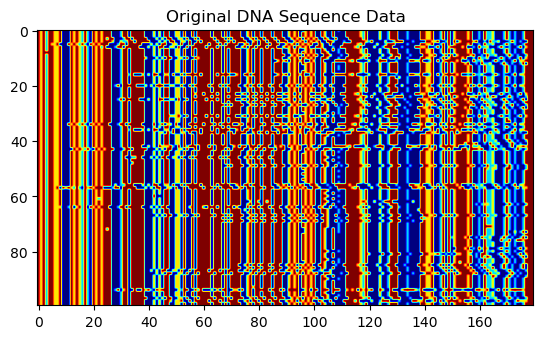

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import PickleUtil

def dna_sequence_to_numeric(dna_sequence_list):
    base_mapping = {"A": 0, "C": 1, "G": 2, "T": 3}
    num_sequences = len(dna_sequence_list)
    max_sequence_length = max(len(seq) for seq in dna_sequence_list)

    # Initialize a 2D NumPy array filled with zeros
    numeric_array = np.zeros((num_sequences, max_sequence_length), dtype=int)

    for i, seq in enumerate(dna_sequence_list):
        for j, base in enumerate(seq):
            numeric_array[i, j] = base_mapping.get(base, -1)

    return numeric_array


pk = PickleUtil.PickleLoader(clones=["3D7", "7G8", "DD2"])

[_3D7_data, _7G8_data, _DD2_data] = pk.load_pickle()

mix_data = np.concatenate((_3D7_data, _7G8_data, _DD2_data))
np.random.shuffle(mix_data)

original_sample = np.array([dna_sequence_to_numeric(mix_data[1440:1540])]).astype('float32') / 3
original_sample = original_sample.reshape(original_sample.shape[0], 100, 178, 1)
padding_config = ((0, 0), (0, 0), (0, 2), (0, 0))
original_sample = np.pad(original_sample, padding_config, mode='constant', constant_values=1)

plt.imshow(original_sample[0, :, :, 0], cmap="jet")
plt.title("Original DNA Sequence Data")
plt.show()
